In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/Rakshita/Desktop/knee/project1/AccelDataByDay06.txt", sep="|")

In [3]:
data.head()

,ID,VERSION,V06PAStudyDay,V06VDaySequence,V06PAMonth,V06PAWeekDay,V06DAYModMinT,V06DAYModMinF,V06DAYModMinS,V06DAYVigMinT,...,V06DAYLtMinT,V06DAYLtMinF,V06DAYLtMinS,V06DAYMVBoutMinT,V06DAYMVBoutMinF,V06DAYMVBoutMinS,V06DAYVBoutMinT,V06DAYVBoutMinF,V06DAYVBoutMinS,V06WearHr
0,9000099,6.2.1,414,1,9,Friday,77,78,174,0,...,267,266,169,65,65,76,0,0,0,17.533333
1,9000099,6.2.1,415,2,9,Saturday,79,87,249,0,...,421,413,251,59,59,146,0,0,0,17.050000
2,9000099,6.2.1,416,3,9,Sunday,67,67,140,0,...,217,217,144,65,65,88,0,0,0,17.483333
3,9000099,6.2.1,417,4,9,Monday,77,78,201,0,...,323,322,192,68,68,97,0,0,0,16.883333
4,9000099,6.2.1,418,5,9,Tuesday,74,75,161,0,...,235,234,148,65,65,87,0,0,0,15.833333


In [4]:
##A. KL history features + Swartz features + Troiano features + Freedson features
data.drop(['VERSION','V06VDaySequence','V06PAStudyDay','V06PAMonth','V06PAWeekDay','V06WearHr'],axis=1,inplace=True) #we don't need these column

In [5]:
#B. KL history features + Swartz features
# data.drop(['V06DAYModMinT', 'V06DAYModMinF','V06DAYVigMinT', 'V06DAYVigMinF', 'V06DAYMVMinT','V06DAYMVMinF', 'V06DAYLtMinT','V06DAYLtMinF', 'V06DAYMVBoutMinT', 'V06DAYMVBoutMinF', 'V06DAYVBoutMinT', 'V06DAYVBoutMinF'],axis=1,inplace=True)

In [6]:
#C. KL history features + Troiano features
# data.drop(['V06DAYModMinF', 'V06DAYModMinS', 'V06DAYVigMinF', 'V06DAYVigMinS','V06DAYMVMinF', 'V06DAYMVMinS','V06DAYLtMinF', 'V06DAYLtMinS', 'V06DAYMVBoutMinF','V06DAYMVBoutMinS', 'V06DAYVBoutMinF', 'V06DAYVBoutMinS'],axis=1,inplace=True) #we don't need these column

In [7]:
#D. KL history features + Freedson features
# data.drop(['V06DAYModMinT', 'V06DAYModMinS','V06DAYVigMinT', 'V06DAYVigMinS', 'V06DAYMVMinT', 'V06DAYMVMinS', 'V06DAYLtMinT', 'V06DAYLtMinS', 'V06DAYMVBoutMinT', 'V06DAYMVBoutMinS', 'V06DAYVBoutMinT','V06DAYVBoutMinS'],axis=1,inplace=True) #we don't need these column

In [8]:
#E. Swartz features + Troiano features + Freedson features
#I need to delete the Kl history for this one

In [9]:
data.columns

Index(['ID', 'V06DAYModMinT', 'V06DAYModMinF', 'V06DAYModMinS',
       'V06DAYVigMinT', 'V06DAYVigMinF', 'V06DAYVigMinS', 'V06DAYMVMinT',
       'V06DAYMVMinF', 'V06DAYMVMinS', 'V06DAYCnt', 'V06DAYLtMinT',
       'V06DAYLtMinF', 'V06DAYLtMinS', 'V06DAYMVBoutMinT', 'V06DAYMVBoutMinF',
       'V06DAYMVBoutMinS', 'V06DAYVBoutMinT', 'V06DAYVBoutMinF',
       'V06DAYVBoutMinS'],
      dtype='object')

In [10]:
data.head()

,ID,V06DAYModMinT,V06DAYModMinF,V06DAYModMinS,V06DAYVigMinT,V06DAYVigMinF,V06DAYVigMinS,V06DAYMVMinT,V06DAYMVMinF,V06DAYMVMinS,V06DAYCnt,V06DAYLtMinT,V06DAYLtMinF,V06DAYLtMinS,V06DAYMVBoutMinT,V06DAYMVBoutMinF,V06DAYMVBoutMinS,V06DAYVBoutMinT,V06DAYVBoutMinF,V06DAYVBoutMinS
0,9000099,77,78,174,0,0,1,77,78,175,484948,267,266,169,65,65,76,0,0,0
1,9000099,79,87,249,0,0,0,79,87,249,571815,421,413,251,59,59,146,0,0,0
2,9000099,67,67,140,0,0,0,67,67,140,406252,217,217,144,65,65,88,0,0,0
3,9000099,77,78,201,0,0,7,77,78,208,532713,323,322,192,68,68,97,0,0,0
4,9000099,74,75,161,0,0,0,74,75,161,437370,235,234,148,65,65,87,0,0,0


In [11]:
def im_awesome(df):
    whole=[]
    times_index=df.groupby(['ID']).size().values
    times_index=np.insert(times_index,0,0)
    indexes=df['ID'].unique()
    dataf=df.copy()
    dataf.drop(['ID'],axis=1,inplace=True)
    
    for i in range(len(times_index)-1):
        ex=dataf[times_index[i]:times_index[i]+times_index[i+1]]
        dt=np.array(ex)
        dt=np.tile(dt,times_index[i+1])
        ex=pd.DataFrame(dt)
        
        for j in range(int(len(ex.T)/len(dataf.columns))):
            ints=np.arange(0,len(dataf.columns),1)+j*len(dataf.columns)
            ex[ints]=ex[ints].shift(-j)
        
        ex=ex.dropna()
        whole.append(ex)
        
    frame=pd.DataFrame()

    for i in whole:
        frame=frame.append(i)

#     frame=frame.shift(1,axis=1)
    frame=frame.fillna(0)
    frame['ID']=indexes
    
    return frame

pivoted=im_awesome(data)  

In [12]:
pivoted.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,ID
0,77,78,174,0,0,1,77,78,175,484948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000099
0,10,11,132,0,0,0,10,11,132,224700,...,296.0,295.0,175.0,11.0,11.0,64.0,0.0,0.0,0.0,9001695
0,15,20,217,0,0,0,15,20,217,330674,...,95.0,95.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,9001897
0,15,20,217,0,0,0,15,20,217,330674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9002116
0,26,31,169,0,0,0,26,31,169,270800,...,155.0,155.0,109.0,0.0,0.0,9.0,0.0,0.0,0.0,9002430


In [13]:
target = pd.read_csv('C:/Users/Rakshita/Desktop/knee/project1/target.csv',index_col=0)

In [14]:
#we delete here some ids that we probably need. So this is ambigular

col = pd.DataFrame(data.ID.unique(), columns=['ID']) #unique ids of data

y = target.merge(col, how='inner', indicator=True)

y.drop(y.columns[[2]],axis=1,inplace=True) #we don't need merge column

val = y['ID']


In [15]:
y.drop(['ID'],axis=1,inplace=True)
y = y.set_index(val)

In [16]:
y = pd.Series(y['target'], index=val)

In [17]:
import collections, numpy

collections.Counter(y)  #problem because we see a that the dataset is unbalanced

Counter({4: 1, 1: 215, 0: 904})

In [18]:
# pivoted = pivoted.reset_index()
x_data = pivoted[pivoted['ID'].isin(val)]

In [19]:
#we put more features to our dataset based on the KL file

df = pd.read_excel("C:/Users/Rakshita/Desktop/knee/project1/KL.xlsx",header = None, names = ['ID','SIDE','V00XRKL','V01XRKL','V03XRKL','V05XRKL','V06XRKL','V08XRKL','V10XRKL'])

col = pd.DataFrame(x_data.ID.unique(), columns=['ID']) #unique ids of data
df = df.merge(col, how='inner', indicator=True)

df.drop(['_merge'],axis=1,inplace=True) #we don't need merge column


df = df.dropna(subset=['V06XRKL'])
df = df.dropna(subset=['V08XRKL','V10XRKL'], how='all')

df.drop(['SIDE','V08XRKL','V10XRKL'],axis=1,inplace=True)
df1 = df.copy()
df1.drop(['ID'],axis=1,inplace=True)
df['mean'] = df1.mean(axis=1)
df['std'] = df1.std(axis=1)
df['variance'] = df1.var(axis=1)

df.drop(['V00XRKL','V01XRKL','V03XRKL','V05XRKL'],axis=1,inplace=True)

df = df.groupby('ID').max().reset_index()

df.head()

,ID,V06XRKL,mean,std,variance
0,9001695,0.0,0.0,0.000000,0.0
1,9001897,1.0,0.2,0.447214,0.2
2,9003126,0.0,0.0,0.000000,0.0
3,9004184,1.0,1.0,0.000000,0.0
4,9006140,0.0,0.0,0.000000,0.0


In [20]:
col = pd.DataFrame(df.ID.unique(), columns=['ID']) #unique ids of data
x_data = x_data.merge(col, how='inner', indicator=True)
x_data.drop(['_merge'],axis=1,inplace=True) #we don't need merge column

In [21]:
X = pd.concat([df,x_data], axis=1)

In [22]:
X.head()

,ID,V06XRKL,mean,std,variance,0,1,2,3,4,...,124,125,126,127,128,129,130,131,132,ID
0,9001695,0.0,0.0,0.000000,0.0,10,11,132,0,0,...,296.0,295.0,175.0,11.0,11.0,64.0,0.0,0.0,0.0,9001695
1,9001897,1.0,0.2,0.447214,0.2,15,20,217,0,0,...,95.0,95.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,9001897
2,9003126,0.0,0.0,0.000000,0.0,15,20,217,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9003126
3,9004184,1.0,1.0,0.000000,0.0,15,20,217,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9004184
4,9006140,0.0,0.0,0.000000,0.0,74,75,161,0,0,...,291.0,290.0,193.0,0.0,0.0,46.0,0.0,0.0,0.0,9006140


In [23]:
X = X.iloc[:, :-1] #we delete the last column because it is the ID and we already have it

In [24]:
X.head()

,ID,V06XRKL,mean,std,variance,0,1,2,3,4,...,123,124,125,126,127,128,129,130,131,132
0,9001695,0.0,0.0,0.000000,0.0,10,11,132,0,0,...,278446.0,296.0,295.0,175.0,11.0,11.0,64.0,0.0,0.0,0.0
1,9001897,1.0,0.2,0.447214,0.2,15,20,217,0,0,...,37290.0,95.0,95.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9003126,0.0,0.0,0.000000,0.0,15,20,217,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9004184,1.0,1.0,0.000000,0.0,15,20,217,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9006140,0.0,0.0,0.000000,0.0,74,75,161,0,0,...,200240.0,291.0,290.0,193.0,0.0,0.0,46.0,0.0,0.0,0.0


In [25]:
target = pd.read_csv('C:/Users/Rakshita/Desktop/knee/project1/target.csv',index_col=0)

#we delete here some ids that we probably need. So this is ambigular

col = pd.DataFrame(x_data['ID'].unique(), columns=['ID']) #unique ids of data

y = target.merge(col, how='inner', indicator=True)

y.drop(y.columns[[2]],axis=1,inplace=True) #we don't need merge column

val = y['ID']

y.drop(['ID'],axis=1,inplace=True)
y = y.set_index(val)


In [26]:
import collections, numpy

collections.Counter(y.target)  #problem because we see a that the dataset is unbalanced

Counter({4: 1, 1: 215, 0: 904})

In [27]:
# X = X.iloc[:, [1,2,3,4,5,134,120,126,119,125,62,68,14,36,73,72,121,127,131,128,77,100,106,129,130,101,107,132,133,39,63,69,112,71,113,114,64,71,111,110,109,16,115,102,108,7,24,30,25,31,91]]
# this is for selected columns only

In [28]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,ID
0,10,11,132,0,0,0,10,11,132,224700,...,296.0,295.0,175.0,11.0,11.0,64.0,0.0,0.0,0.0,9001695
1,15,20,217,0,0,0,15,20,217,330674,...,95.0,95.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,9001897
2,15,20,217,0,0,0,15,20,217,330674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9003126
3,15,20,217,0,0,0,15,20,217,330674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9004184
4,74,75,161,0,0,0,74,75,161,437370,...,291.0,290.0,193.0,0.0,0.0,46.0,0.0,0.0,0.0,9006140


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [30]:
#resample for train

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


from collections import Counter

print(sorted(Counter(y_train_resampled).items()))



Using TensorFlow backend.


[('target', 1)]


In [31]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\rakshita\anaconda3\lib\site-packages (0.6.2)
Note: you may need to restart the kernel to use updated packages.


In [32]:
#standarize the data

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train_resampled)

X_train_resampled = scaler.transform(X_train_resampled)  
X_test = scaler.transform(X_test) 


In [33]:
#decision tree approach

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier()

params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

model1.fit(X_train_resampled, y_train_resampled)

print("Best Hyper Parameters:",model1.best_params_)

y_pred = model1.predict(X_test)

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
dsc=metrics.accuracy_score(y_test, y_pred)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 123}
[[154  32]
 [ 23  15]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       186
           1       0.32      0.39      0.35        38

    accuracy                           0.75       224
   macro avg       0.59      0.61      0.60       224
weighted avg       0.78      0.75      0.76       224

Accuracy: 0.7544642857142857


In [36]:
#k nearest neighbours

from sklearn.neighbors import KNeighborsClassifier  

model = KNeighborsClassifier(n_jobs=-1)

params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

model1.fit(X_train_resampled, y_train_resampled) 

print("Best Hyper Parameters:\n",model1.best_params_)

y_pred=model1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
kn=metrics.accuracy_score(y_test, y_pred)

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A col

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}
[[130  56]
 [ 17  21]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       186
           1       0.27      0.55      0.37        38

    accuracy                           0.67       224
   macro avg       0.58      0.63      0.57       224
weighted avg       0.78      0.67      0.71       224

Accuracy: 0.6741071428571429


In [37]:
#random forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

model1.fit(X_train_resampled, y_train_resampled)  

print("Best Hyper Parameters:\n",model1.best_params_)

y_pred = model1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
rf=metrics.accuracy_score(y_test, y_pred)

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
[[149  37]
 [ 23  15]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       186
           1       0.29      0.39      0.33        38

    accuracy                           0.73       224
   macro avg       0.58      0.60      0.58       224
weighted avg       0.77      0.73      0.75       224

Accuracy: 0.7321428571428571


In [38]:
#support vector machines 
from sklearn import svm
from sklearn.svm import SVC,SVR
from sklearn.model_selection import GridSearchCV

model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,100,1000,10000], 
          'kernel': ['sigmoid','rbf','poly']}

model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

model1.fit(X_train_resampled, y_train_resampled) 

print("Best Hyper Parameters:\n",model1.best_params_)

prediction=model1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
svm=metrics.accuracy_score(y_test, y_pred)
import matplotlib.pyplot as plt
plt.title('Model accuracy')
plt.ylabel('y_test')
plt.xlabel('y_pred')
plt.plot(dsc, label = "line 1") 
plt.plot(kn, label = "line 2") 
#plt.plot(rf, label = "line 3") 
#plt.plot(svm, label = "line 4") 
plt.show()

C:\Users\Rakshita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyper Parameters:
 {'C': 10000, 'kernel': 'rbf'}
[[149  37]
 [ 23  15]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       186
           1       0.29      0.39      0.33        38

    accuracy                           0.73       224
   macro avg       0.58      0.60      0.58       224
weighted avg       0.77      0.73      0.75       224

Accuracy: 0.7321428571428571


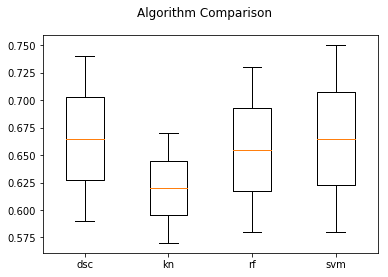

In [56]:
import pandas
import matplotlib.pyplot as plt

# evaluate each model in turn
names = ['dsc','kn','rf','svm']
results = [[0.59,0.74],[0.67,0.57],[0.73,0.58],[0.75,0.58]]
#results = [[dsc,0.74],[kn,0.67],[rf,0.73],[svm,0.75]]
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()